# Theoretical Background
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
$$
Consider a free atom with the atomic Hamiltonian $H_0$ with stationary eigenfunctions $\psi_n$, and corresponding eigenenergies $E_n=\hbar\omega_n$. Specifically:
$$
H_0\psi_n = E_n\psi_n
$$

Consider this atom interacting with light, which adds time-dependent terms to the overall Hamiltonian. This addition is $H'(t)$ to form the overall Hamiltonian, $H=H_0+H'(t)$ the consequences is the mixing of the above stationary eigenstates.

The eigenfunctions $\psi_n$ form a complete set, so the new overall mixed wavefunction can still be expressed as
$$
\Psi(t) = \sum_n c_n(t) \psi_n e^{-i\omega_nt}
$$
Usually, $H'(t)$ and $H_0$ do not commute, so do not share a common set of eigenfunctions.
The time-dependent Schrodinger equation (TDSE) is
$$
H\Psi(t) = i\hbar \frac{\partial \Psi(t)}{\partial t}
$$
Substituting these equations into each other will lead to equations for the coefficients $c_n$. Bra-ket notation will be used for simplicity, with $\psi_n = \ket{n}$
$$
(H_0+H'(t))(\sum_n c_n(t) \ket{n} e^{-i\omega_nt}) = i\hbar \frac{\partial}{\partial t} (\sum_n c_n(t) \ket{n} e^{-i\omega_nt})
$$
Product rule on time derivative, and applying $H_0$
$$
\sum_n \hbar \omega_n c_n(t) \ket{n} e^{-i\omega_nt} + H'(t)\sum_n c_n(t) \ket{n} e^{-i\omega_nt} = i\hbar \sum_n \ket{n} (-i\omega_n c_n(t) + \dot{c}_n(t)) e^{-i\omega_nt}
$$
Cancel out matching sum
$$
H'(t)\sum_n c_n(t) \ket{n} e^{-i\omega_nt} = i\hbar \sum_n \ket{n} \dot{c}_n(t) e^{-i\omega_nt}
$$
Multiply through by $\bra{m}$ (and implicitly integrating),
$$
\sum_n c_n(t) \bra{m}H'(t)\ket{n} e^{-i\omega_nt} = i\hbar \sum_n \braket{m}{n} \dot{c}_n(t) e^{-i\omega_nt}
$$
Using orthonormality of states, and rearanging, defining $w_{mn} = w_m-w_n$:
$$
\dot{c}_m(t) = \frac{1}{i\hbar} \sum_n c_n(t) \bra{m}H'(t)\ket{n} e^{i\omega_{mn}t}
$$
Note that this equation can be rearanged into a matrix equation that looks like the TDSE:
$$
i\hbar \frac{\partial}{\partial t} 
\begin{pmatrix}
c_0(t)\\
\vdots\\
c_m(t)
\end{pmatrix}
= 
\begin{pmatrix}
\bra{0}H'(t)\ket{0}e^{iw_{00}t} & \dots & \bra{0}H'(t)\ket{n}e^{iw_{0n}t} \\
\vdots                          & \ddots & \vdots                          \\
\bra{n}H'(t)\ket{0}e^{iw_{n0}t} & \dots & \bra{n}H'(t)\ket{n}e^{iw_{nn}t} \\
\end{pmatrix}
\begin{pmatrix}
c_0(t)\\
\vdots\\
c_m(t)
\end{pmatrix}
$$
So far, we have used no approximations, this is exactly equivalent to the Schrodinger equation. From here, analytical solutions only occur in certain cases, or from applying approximations.

Finally giving a form to $\hat{H}'(t) = \bf{\hat{d}} \cdot \bf{\hat{E}}$ Where $\bf{\hat{d}}$ is the electric dipole operator, and $E = \hat{\epsilon} E_0  cos (\mathbf{k} \cdot \mathbf{r} - \omega t)$ is a plane wave.

Assuming a two level atom, with states $\ket{g}$ and $\ket{e}$ for ground and excited state, using the dipole approximation so that on-diagonal terms dissapear, yields two coupled differential equations.
$$
i\hbar\dot{c}_g(t) = c_e(t) \bra{g}\mathbf{\hat{d}}\cdot\mathbf{\hat{E}}\ket{e} e^{i\omega_{ge}t}
$$
$$
i\hbar\dot{c}_e(t) = c_g(t) \bra{e}\mathbf{\hat{d}}\cdot\mathbf{\hat{E}}\ket{g} e^{-i\omega_{ge}t}
$$
Inserting the definition of $\mathbf{\hat{E}}$ gives an important parameter, the Rabi Frequency
$$
\Omega = \frac{E_0}{\hbar}\bra{e}\mathbf{\hat{d}}\cdot\mathbf{\hat{\epsilon}}\ket{g}
$$
Leaving the following differential equations (also expanding the cos in exponential form):
$$
i\hbar\dot{c}_g(t) = c_e(t) \frac{\hbar}{2} \Omega^* (e^{i(\omega-\omega_0)t}+e^{-i(\omega+\omega_0)t})
$$
$$
i\hbar\dot{c}_e(t) = c_g(t) \frac{\hbar}{2} \Omega (e^{-i(\omega-\omega_0)t}+e^{i(\omega+\omega_0)t})
$$
We will now use the 'Rotating Wave Approximation' to ignore terms like $e^{i(\omega+\omega_0)t}$. Defining a new 'detuning' parameter $\Delta = w-w_0$ the coupled equations can now be written:
$$
i\hbar\dot{c}_g(t) = c_e(t) \frac{\hbar}{2} \Omega^* e^{i \Delta t}
$$
$$
i\hbar\dot{c}_e(t) = c_g(t) \frac{\hbar}{2} \Omega e^{-i \Delta t}
$$
Making the rotating frame transformation simplifies the equations. $\tilde{c}_e(t) := c_e(t)e^{i\Delta t}$

# Import appropriate modules

In [1]:
import numpy as np
from numpy.linalg import eigh
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

import scipy.constants
from scipy.special import sph_harm

from sympy.physics.wigner import wigner_3j

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter, MultipleLocator
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.figsize'] = (4, 3.5)
plt.rcParams['figure.dpi'] = 200

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# Define constants

In [2]:
# Physical Constants
H_BAR = scipy.constants.hbar

# 2-level state variation

<IPython.core.display.Javascript object>


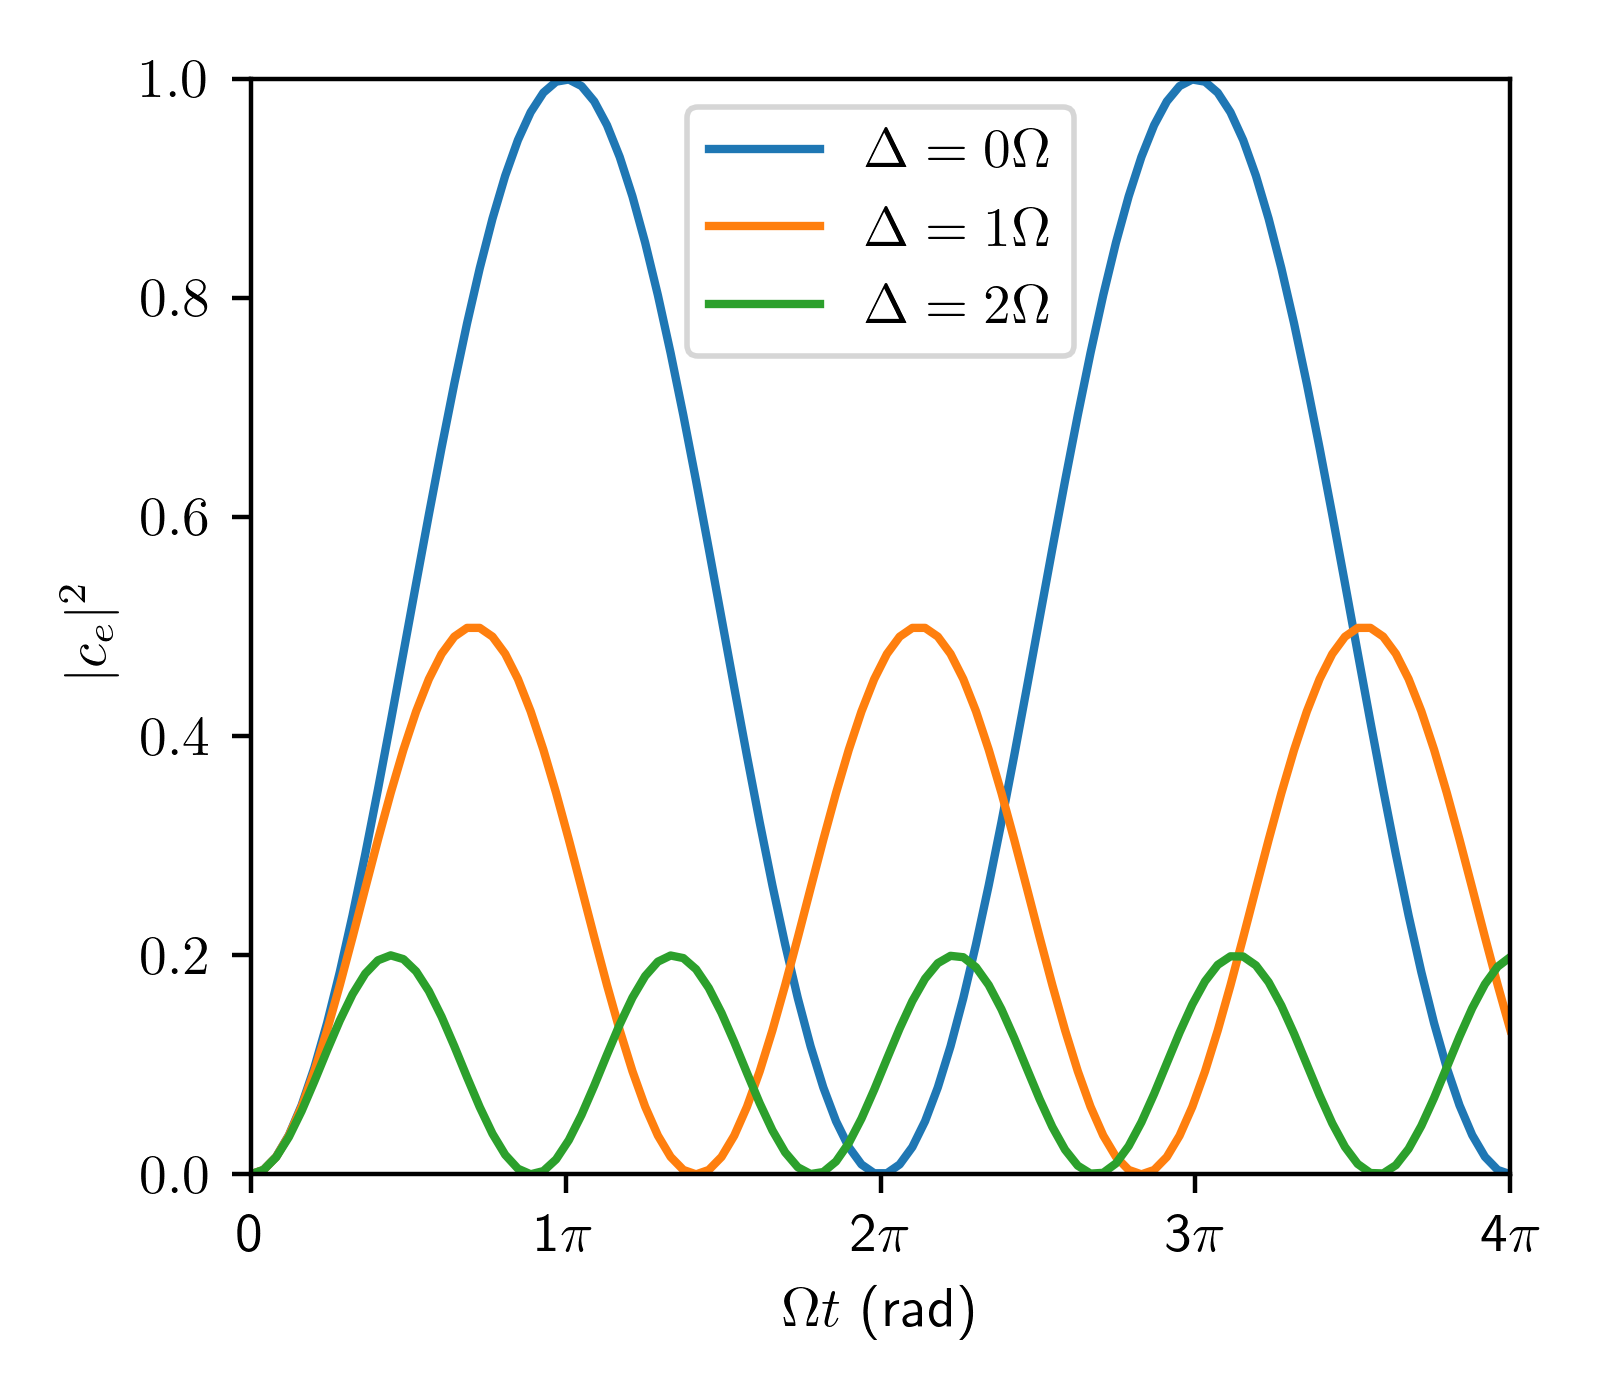

In [11]:
fig,ax = plt.subplots()

omega = 1 # Rabi Frequency = E_0/hbar <e|d.e|g>

T_MIN = 0
T_MAX = np.pi*4
T_STEPS = 100
times = np.linspace(T_MIN,T_MAX,T_STEPS)

for detuning_ratio in [0,1,2]: # \Delta = w-w_0
    detuning = detuning_ratio * omega
    
    ham = H_BAR/2 * np.array([[0, omega],[omega, -2*detuning]])

    initial = np.array([1,0])

    unitaries = np.array([scipy.linalg.expm(-(1j)*t*ham/H_BAR) for t in times])
    finals = np.matmul(unitaries,initial)

    ax.plot(times*omega,np.abs(finals[:,1])**2, label=f"$\Delta={detuning_ratio}\Omega$")

ax.set_xlim(0,T_MAX*omega)
ax.set_ylim(0,1)
ax.set_xlabel("$\Omega t$ (rad)")
ax.set_ylabel("$|c_e|^2$")
ax.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.legend()
fig.show()

# 2-level detuning dependence

<IPython.core.display.Javascript object>


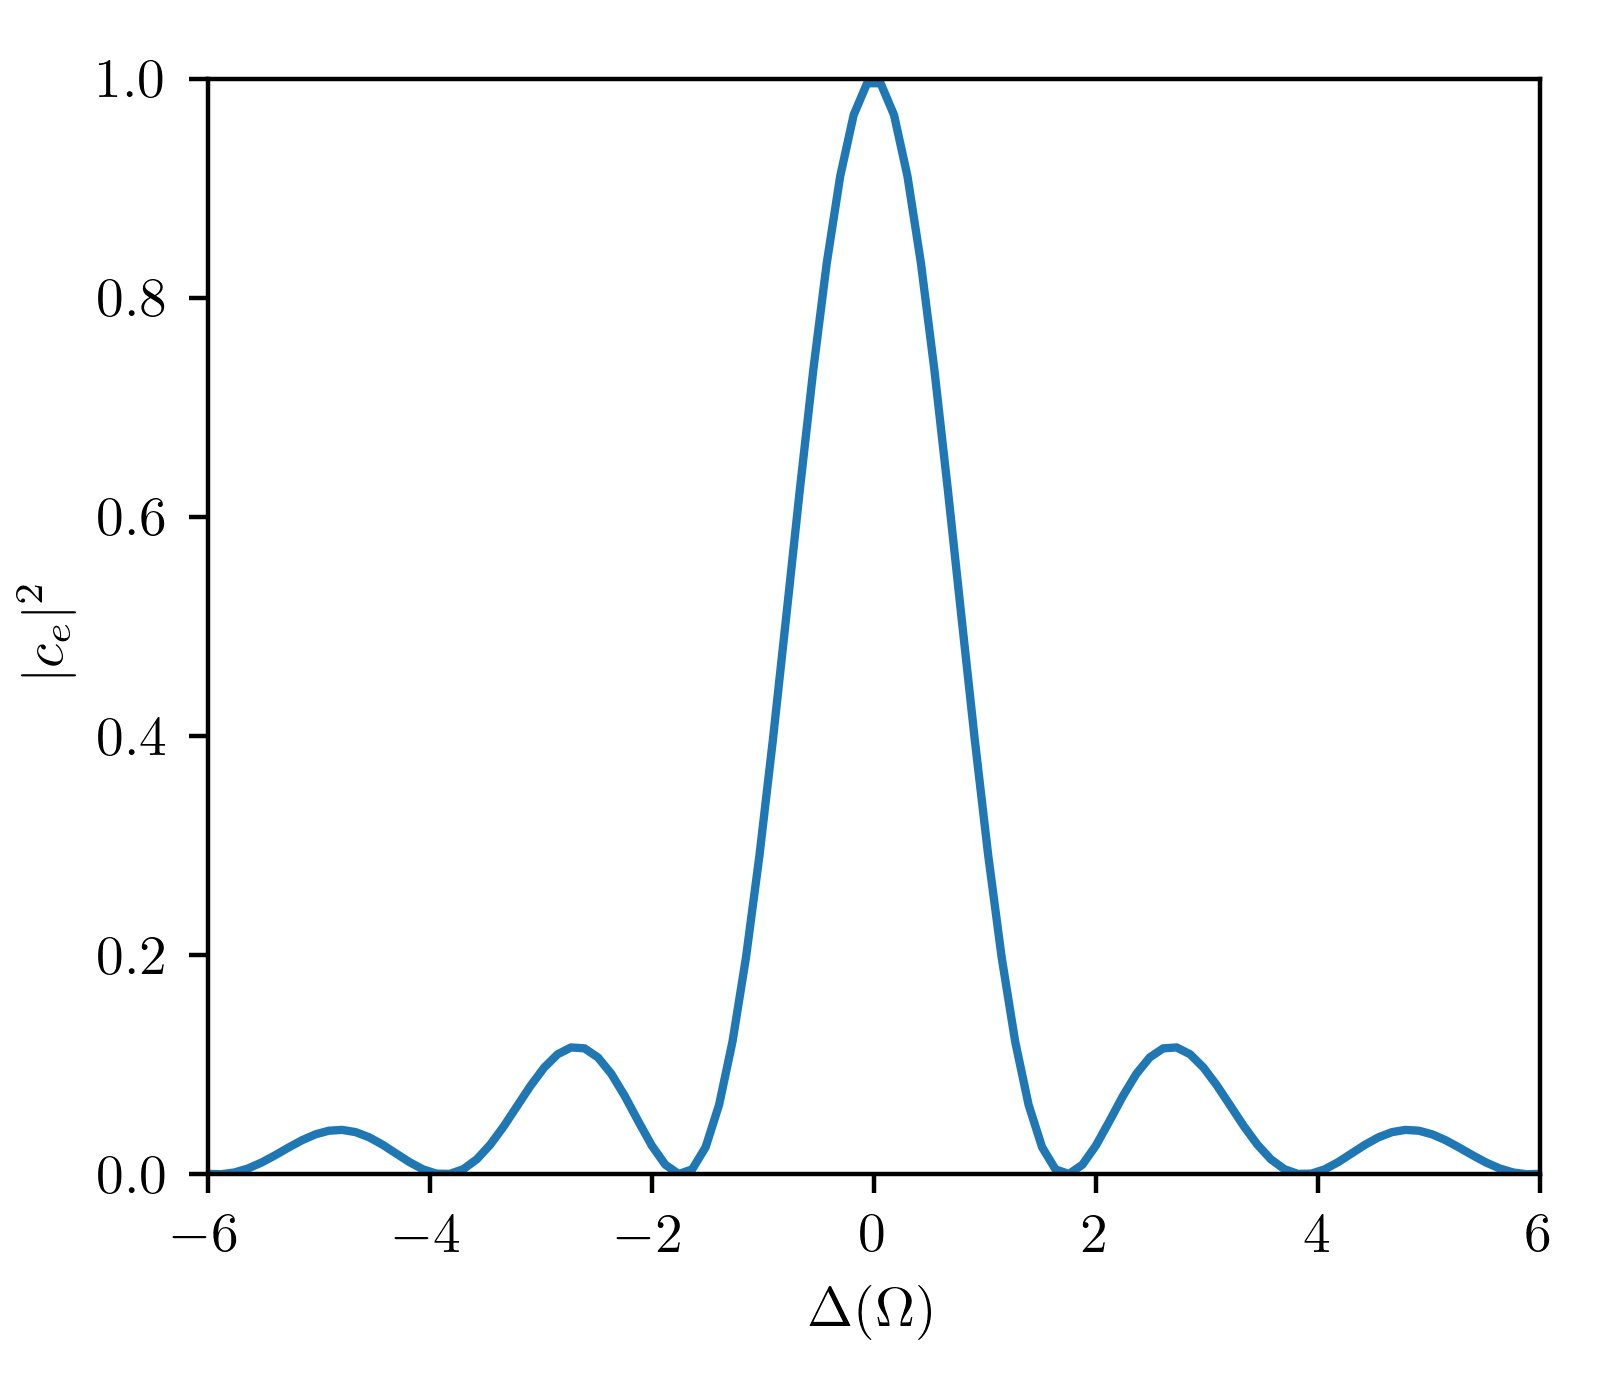

In [29]:
fig,ax = plt.subplots()

omega = 6 # Rabi Frequency = E_0/hbar <e|d.e|g>

D_MIN = -6
D_MAX = +6
D_STEPS = 100
detunings = np.linspace(D_MIN*omega,D_MAX*omega,D_STEPS)

transferred = []
for detuning in detunings: # \Delta = w-w_0
    
    ham = H_BAR/2 * np.array([[0, omega],[omega, -2*detuning]])
    initial = np.array([1,0])
    t=np.pi/omega
    unitary = scipy.linalg.expm(-(1j)*t*ham/H_BAR)
    final = np.matmul(unitary,initial)
    transferred.append(np.abs(final[1])**2)

ax.plot(detunings/omega, transferred)

ax.set_xlim(D_MIN,D_MAX)
ax.set_ylim(0,1)
ax.set_xlabel("$\Delta (\Omega)$")
ax.set_ylabel("$|c_e|^2$")
fig.show()